# Example usage

## Do protocols get published?

At CTIS/euclinicaltrials.eu all clinical trial protocols are public by default. But it is possible to apply for a deferral in some cases, for example, to protect intellectual property. How often does that happen? Let's find out.

In [1]:
from euclinicaltrials import Trial, CTIS
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
trial_ids = CTIS.get_all_trial_numbers()
all_trials = [Trial(EUCTNUMBER) for EUCTNUMBER in trial_ids] # List of all trials in the database
total_published = sum([1 for trial in all_trials if trial.is_protocol_published()]) # This could take a couple of minutes to execute
print(f'Out of {len(all_trials)} trials, {total_published} have a published protocol.')

Out of 81 trials, 41 have a published protocol.


The member states are responsible for approving these deferrals. So let's see how that fraction behaves between different countries:

In [3]:
# We have downloaded the webpages necessary in the last step, so this should be quick now
# We calculate the number of trials that have a protocol published by country

member_states_protocol_published = {} # Will have form {'Germany': [False, False, ...], ...}
for trial in all_trials:
    has_published = trial.is_protocol_published()
    for member_state in trial.member_states_concerned():
        if member_state is None or type(member_state) is not str:
            continue
        if member_state not in member_states_protocol_published:
            member_states_protocol_published[member_state] = []
        member_states_protocol_published[member_state].append(has_published)

Now, we can make a nice bar chart to show the number and fraction of trials that published their protocols by country

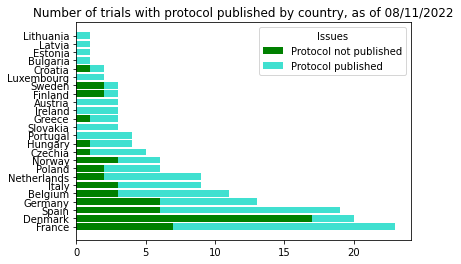

In [4]:
countries = list(member_states_protocol_published.keys())
countries.sort(key=lambda x: len(member_states_protocol_published[x]), reverse=True) # Sort countries by number of trials
totals_published = []
totals_unpublished = []
for country in countries:
    totals_published.append(sum(member_states_protocol_published[country]))
    totals_unpublished.append(len(member_states_protocol_published[country]) - sum(member_states_protocol_published[country]))
b1 = plt.barh(countries, totals_published, color="green")
b2 = plt.barh(countries, totals_unpublished, left=totals_published, color="turquoise")
plt.legend([b1, b2], ["Protocol not published", "Protocol published"], title="Issues", loc="upper right")
plt.title(f"Number of trials with protocol published by country, as of {time.strftime('%d/%m/%Y')}")
plt.show()